In [60]:
import matplotlib.pyplot as plt
import numpy as np

In [61]:
def euler_step(y,t,f,h):
    return y+h*f(t,y)

In [62]:
def euler_method(t_0,y_0,f,h,N):
    time=[]
    y_list =[]
    y = []
    y_n = y_0
    t_n = t_0
    step = 1
    while step <=N:
        t = t_n+h
        y = euler_step(y_n,t_n,f,h)
        time.append(t)
        y_list.append(y)
        y_n = y
        t_n = t
        step+=1
    return [y_list, time]

In [63]:
def euler_step_SIR(s_n,i_n,r_n,t_n,s,h):
    return s_n+h*s(t_n,s_n,i_n,r_n)

In [74]:
def euler_method_SIR(t_0,s_0,i_0,r_0,s,i,r,h,N):
    time=[]
    s_list =[]
    i_list =[]
    r_list =[]
    
    s_step = []
    i_step = []
    r_step = []
    
    s_n = s_0
    i_n = i_0
    r_n = r_0

    t_n = t_0
    
    step = 1
    while step <=N:
        s_n = euler_step_SIR(s_n,i_n,r_n,t_n,s,h)
        i_n = euler_step_SIR(s_n,i_n,r_n,t_n,i,h)
        r_n = euler_step_SIR(s_n,i_n,r_n,t_n,r,h)
        
        t_n = t_n+h
        time.append(t_n)
        
        s_list.append(s_n)
        i_list.append(i_n)
        r_list.append(r_n)

        step+=1
        
    return [s_list,i_list,r_list, time]

In [75]:
delta = 1/2
gamma = 1/3
N = 10

def s(t,s_t,i_t,r_t):
    return 1/N * (-delta )* s_t * i_t
def i(t,s_t,i_t,r_t):
    return 1/N * delta* s_t*i_t - gamma*i_t
def r(t,s_t,i_t,r_t):
    return gamma * i_t



In [76]:
result = euler_method_SIR(0,10,1,0,s,i,r,0.5,1000)
res_s = result[0]
res_i = result[1]
res_r = result[2]
res_t = result[3]


In [80]:
def plot_SIR_model (delta,gamma, s_0,i_0,r_0,N, iterations):
    def s(t,s_t,i_t,r_t):
        return 1/N * (-delta )* s_t * i_t
    def i(t,s_t,i_t,r_t):
        return 1/N * delta* s_t*i_t - gamma*i_t
    def r(t,s_t,i_t,r_t):
        return gamma * i_t
    
    result = euler_method_SIR(0,s_0,i_0,r_0,s,i,r,0.5,iterations)
    res_s = result[0]
    res_i = result[1]
    res_r = result[2]
    res_t = result[3]
    
    plt.plot(res_t, res_s)
    plt.plot(res_t, res_i)
    plt.plot(res_t, res_r)



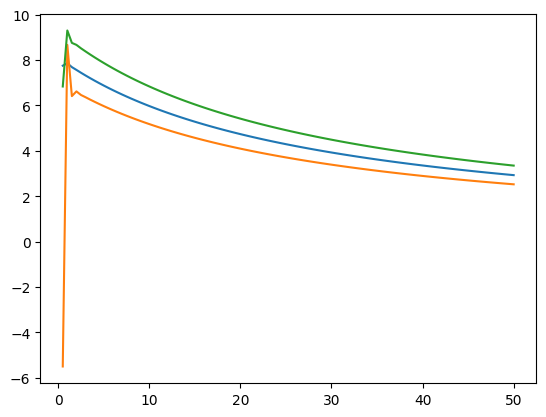

In [86]:

# plot_SIR_model(1/2,1/3,9,1,0,10,10)
plot_SIR_model(1/2,1/3,10,90,0,100,100)

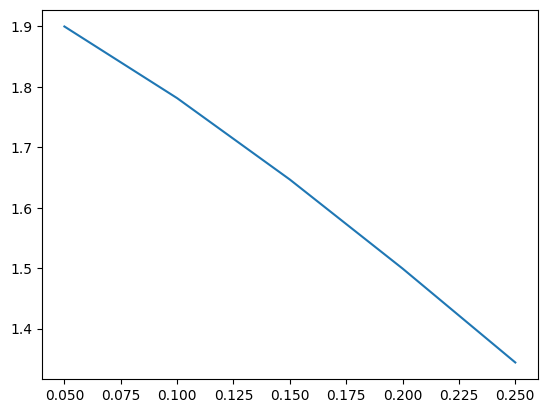

In [79]:
import matplotlib.pyplot as plt
def f(x,y):
    return x**2 - 3*x*y + y**2 - 3*y

sol_y, sol_t =euler_method(0,2,f,0.05,5)
plt.plot(sol_t, sol_y)

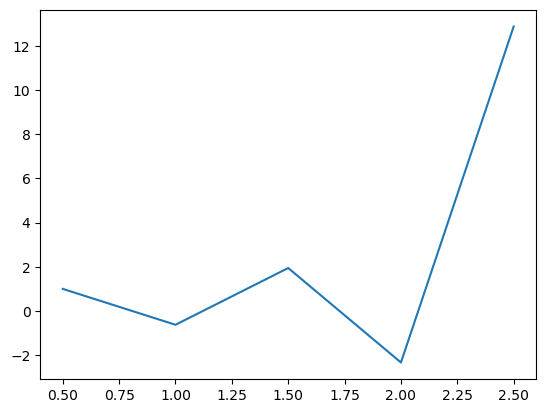

In [17]:
def f(x,y):
    return x**2 - 3*x*y + y**2 - 3*y

sol_y, sol_t =euler_method(0,2,f,0.5,5)
plt.plot(sol_t, sol_y)

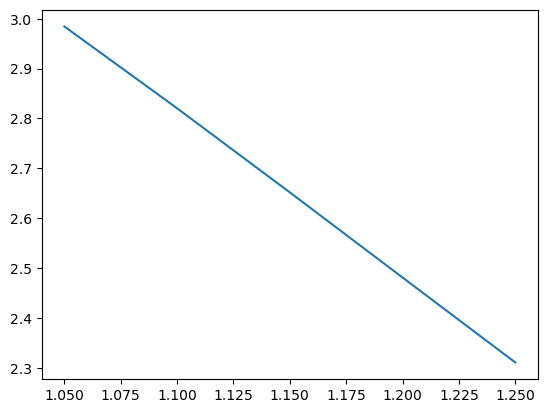

In [22]:
def f(x,y):
    return np.sin(x*y) - x**2 * y

sol_y, sol_t =euler_method(1,np.pi,f,0.05,5)
plt.plot(sol_t, sol_y)

In [30]:
# exercise 2

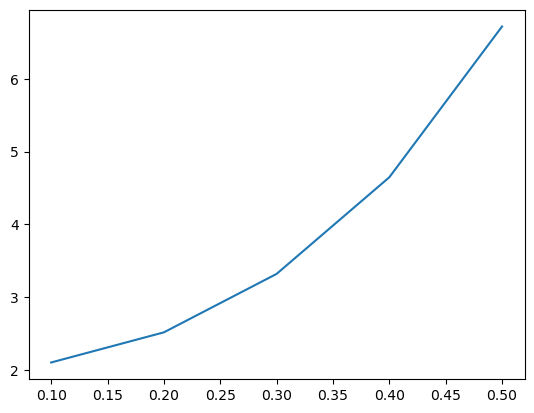

In [34]:
def f(x,y):
    return 7*np.exp(4*x) - 3*y

specific_time =np.arange(0.1, 1.1, 0.1)

sol_y, sol_t =euler_method(0,2,f,0.1,5)
plt.plot(sol_t, sol_y)

def nofsteps (a,b,c):
    return int((b-a)*c)



In [35]:
# three term taylor series 

In [36]:
def tttts_apr(y,t,h,f,part_t, part_y):
    return euler_step(y,t,f,h)

In [37]:
def numerical_method(t_0,y_0,f,h,N,method, part_t=0, part_y=0):
    time=[]
    y_list =[]
    y = []
    y_n = y_0
    t_n = t_0
    step = 1
    while step <=N:
        t = round(t_n+h)
        y = method(y_n,t_n,f,h, part_t, part_y)
        time.append(t)
        y_list.append(y)
        y_n = y
        t_n = t
        step+=1
    return [y_list, time]

In [38]:
def f(t,y):
    return 1+(y-t)**t